###Week 5 Discussion Google Colab Created by Ali Hatamizadeh 




*Load* an image


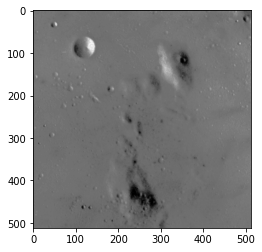

(512, 512)


In [0]:
import scipy
from scipy import misc
import numpy as np
from matplotlib import pyplot as plt
from skimage.data import moon
import math
from numpy.linalg import inv

img=moon()

plt.figure()
plt.imshow(img,cmap='gray')
plt.show()
print(np.shape(img))

###Implement Bilinear Interpolation (From scratch)

x = [0,1,2,0,1,2];  y = [0,0,0,3,3,3]; z = [1,2,3,4,5,6]

x, y and z are arrays of values used to approximate some function f: z = f(x, y). This function uses bilinear interpolation to find the value of new points.

In [0]:
def interp_bilinear(Z,X,Y):

  H,W=np.shape(Z)

  X[X<0]=0
  X[X>W-1]=W-1
  Y[Y<0]=0
  Y[Y>H-1]=H-1

  f_val=[]

  for x,y in zip(X,Y):

    y_min= math.floor(y)
    y_max= math.ceil(y)

    x_min= math.floor(x)
    x_max= math.ceil(x)

    x=x_max-x
    y=y_max-y

    f=Z[y_min,x_min]*(1-x)*(1-y) + Z[y_min,x_max]*y*(1-x) + Z[y_max,x_min]*(1-y)*x+ Z[y_max,x_max]*x*y

    f_val.append(f)

  return f_val

###Get rotation and translation affine matrices


In [0]:
def trans_aff(shift_x,shift_y):
  aff= np.array([[1,0,shift_x],[0,1,shift_y],[0,0,1]])
  return aff

def rot_aff(theta):
  theta=math.radians(theta)
  aff=np.array([[math.cos(theta),-math.sin(theta),0],[math.sin(theta),math.cos(theta),0],[0,0,1]])
  return aff

### Rotate an Image From Scratch 

Implement a function that accepts an image and rotation angle (in degrees) as its input and rotates the image **around its center** and returns it.

First implement a function that return the affine transform matrix for rotating and image about its center. 


In [0]:
def rotate_center(img,theta):

  h,w=np.shape(img)
  M1=trans_aff(-w/2,-h/2)
  M2=rot_aff(theta)
  M3=trans_aff(w/2,h/2)
  
  affine=np.matmul(M3,np.matmul(M2,M1))

  return affine 

  

Finally, implement a transformation function where it recieves the input image and created affine matrix as its inputs and interpolates the function to its new space.

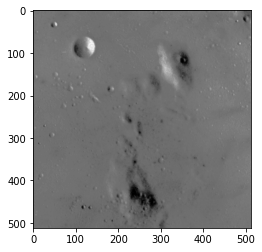

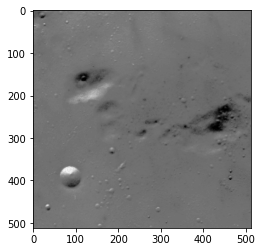

In [0]:
def rotation(img,affine):

  H,W= np.shape(img)

  X_new=[]; Y_new=[];

  for y in range(H):
    for x in range(W):
      x_trans,y_trans,_=np.matmul(np.array([x,y,1]),inv(affine).T)
      X_new.append(x_trans);Y_new.append(y_trans);
  interp_points=interp_bilinear(img,np.array(X_new),np.array(Y_new))

  return np.reshape(interp_points,[H,W])

affine=rotate_center(img,-90)
rotated_img=rotation(img,affine)

plt.figure()
plt.imshow(img,cmap='gray')
plt.figure()
plt.imshow(rotated_img,cmap='gray')